In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import sys


In [ ]:
import json

In [ ]:
f = open('../Results/sampleN20.json')

# returns JSON object as 
# a dictionary
data = json.load(f)
# Print all keys in the JSON dictionary
for key in data.keys():
    print(key)

In [ ]:
S_ising = data['S']
S_exp = data['S_obs']

In [ ]:
plt.plot(S_exp,S_ising,'o')
plt.show()

In [17]:
import os
import glob

filename = f"multithread_pc.sh"

a = "#!/bin/bash\n\n"

b = "# Define uma função que contêm o código para rodar em paralelo\n"

c = "run_code() {\n\t"
d = f"time ../bin/bmc ../inputs/$1\n"
e = "}\n"
f = "# Exportar a função usando o módulo Parallel\n"
g = "export -f run_code\n\n"

path_d = f"../inputs"
all_files = glob.glob(os.path.join(path_d,"*.json"))
list_of_arguments = [V[2] for V in os.walk(path_d)][0]
list_of_arguments = str(list_of_arguments)
list_of_arguments = list_of_arguments.replace(',', '')

h = f"arguments=(" 
i = list_of_arguments[1:-1] + ")\n"
j = "parallel run_code :::\t" +  """ "${arguments[@]}"  """ "\n\t"
list_for_loop = [a,b,c,d,e,g,h,i,j]
l = open("../Scripts/" + filename, "w") # argument w: write if don't exist file
for k in list_for_loop:
    l.write(k)
l.close()

def permission_run():
    os.system(f"chmod 700 ../Scripts/" + filename)

In [16]:
permission_run()

value1: 8.90e-05, value2: 4.20e-05, value3: 3000


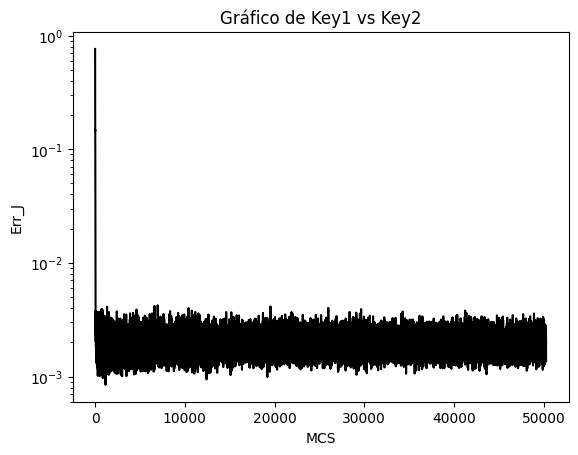

In [40]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import os
import re

# Função para selecionar o arquivo .txt
def selecionar_arquivo():
    root = tk.Tk()
    root.withdraw()  # Esconde a janela principal do Tkinter
    
    
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo TXT",
        filetypes=(("Text files", "*.txt"), ("All files", "*.*"))
    )
    
    return arquivo

def minimum_values(arquivo):
    pattern = r"err_sampleN20_j_min_([+-]?\d+\.?\d*[eE][+-]?\d+|[+-]?\d+\.?\d*)_h_min_([+-]?\d+\.?\d*[eE][+-]?\d+|[+-]?\d+\.?\d*)_t_eq_(\d+)_metropolis\.txt"

    file_name = os.path.basename(arquivo)
    match = re.match(pattern, file_name)
    
    if match:
        # Extract values as strings
        j_min_match, h_min_match, t_eq_match = match.groups()[0:3]
        
        # Convert to float and format in scientific notation
        j_min_sci = format(float(j_min_match), ".2e")
        h_min_sci = format(float(h_min_match), ".2e")
        t_eq = int(t_eq_match)  # Assuming t_eq is an integer
    
    return j_min_sci, h_min_sci, t_eq

# Função para carregar dados do arquivo TXT
def carregar_dados(arquivo, J):
    key1_values = []
    key2_values = []
    
    with open(arquivo, 'r') as f:
        for linha in f:
            valores = linha.split()  # Divide a linha pelos espaços em branco
            if len(valores) >= 2:  # Verifica se há pelo menos duas colunas
                if(J==True):
                    key1_values.append(float(valores[0]))  # Primeira coluna
                    key2_values.append(float(valores[1]))  # Segunda coluna
                else:
                    key1_values.append(float(valores[0]))  # Primeira coluna
                    key2_values.append(float(valores[2]))  # Segunda coluna
    
    return key1_values, key2_values

# Função principal para plotar o gráfico
def plotar_grafico(key1_values, key2_values, J):
    if(J==True):
        ylabel = 'Err_J'
    else:
        ylabel = 'Err_h'
    plt.plot(key1_values, key2_values,color='k')
    
    plt.xlabel('MCS')
    plt.ylabel(ylabel)
    plt.yscale("log")
    plt.title('Gráfico de Key1 vs Key2')
    plt.show()

# Main
if __name__ == "__main__":
    j = True
    arquivo_selecionado = selecionar_arquivo()
    if arquivo_selecionado:
        key1_values, key2_values = carregar_dados(arquivo_selecionado, J=j)
        min_j, min_h, t_eq = minimum_values(arquivo_selecionado)
        
        plotar_grafico(key1_values, key2_values, J=j)
    else:
        print("Nenhum arquivo foi selecionado.")

In [36]:
import re

# Updated pattern to match scientific notation values and ensure proper capture
pattern = r"err_sampleN20_j_min_([+-]?\d+\.?\d*[eE][+-]?\d+|[+-]?\d+\.?\d*)_h_min_([+-]?\d+\.?\d*[eE][+-]?\d+|[+-]?\d+\.?\d*)_t_eq_(\d+)_metropolis\.txt"

# Sample filename
filename = "err_sampleN20_j_min_1.23e-10_h_min_4.56e+20_t_eq_30_metropolis.txt"

# Match the pattern
match = re.match(pattern, filename)

if match:
    # Extract values as strings
    value1, value2, value3 = match.groups()
    
    # Print extracted values for debugging
    print(f"Extracted values: value1={value1}, value2={value2}, value3={value3}")
    
    try:
        # Convert to float and format in scientific notation
        value1_sci = format(float(value1), ".2e")
        value2_sci = format(float(value2), ".2e")
        value3_sci = format(float(value3), ".2e")  # Assuming value3 is an integer
        
        print(f"value1: {value1_sci}, value2: {value2_sci}, value3: {value3_sci}")
    except ValueError as e:
        print(f"Error converting value: {e}")
else:
    print("No match found")


Extracted values: value1=1.23e-10, value2=4.56e+20, value3=30
value1: 1.23e-10, value2: 4.56e+20, value3: 3.00e+01
